# Mike Sandbox

## BOM datafram

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [6]:
df_bom = pd.read_csv('../data/bom.movie_gross.csv')


In [7]:
df_bom

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [8]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [9]:
df_bom.shape

(3387, 5)

In [10]:
df_bom['domestic_gross'].isna().sum()

28

In [11]:
df_bom['foreign_gross'].isna().sum()

1350

In [12]:
df_bom = df_bom[df_bom['domestic_gross'].notna()]

In [13]:
df_bom['domestic_gross'].isna().sum()

0

In [14]:
df_bom = df_bom[df_bom['foreign_gross'].notna()]

In [15]:
df_bom['foreign_gross'].isna().sum()

0

In [16]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   object 
 4   year            2009 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.2+ KB


In [21]:
df_bom.describe()

,domestic_gross,foreign_gross,year
count,2.009000e+03,2.009000e+03,2009.000000
mean,4.697311e+07,7.571822e+07,2013.503235
std,8.159966e+07,1.381296e+08,2.598481
min,4.000000e+02,6.000000e+02,2010.000000
25%,6.650000e+05,3.900000e+06,2011.000000
50%,1.650000e+07,1.930000e+07,2013.000000
75%,5.600000e+07,7.590000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [23]:
df_bom['foreign_gross'] = df_bom['foreign_gross'].str.replace(",","")
df_bom

AttributeError: Can only use .str accessor with string values!

In [24]:
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [20]:
df_bom['foreign_gross'] = df_bom['foreign_gross'].astype(float)


In [26]:
df_bom['total_gross'] = df_bom['foreign_gross'] + df_bom['domestic_gross'] 
df_bom.head()


,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [27]:
df_bom['total_gross'].value_counts()

16900000.0     5
7900000.0      5
15400000.0     5
27400000.0     5
5500000.0      4
              ..
4100000.0      1
10856000.0     1
150400000.0    1
122500000.0    1
256000.0       1
Name: total_gross, Length: 1700, dtype: int64

In [29]:
top_10_highest_grossing_movies = df_bom.sort_values('total_gross', ascending=False)[0:10]
top_10_highest_grossing_movies

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1.309500e+09
1127,Frozen,BV,400700000.0,875700000.0,2013,1.276400e+09
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1.263500e+09
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1.242800e+09
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1.214800e+09


<ipython-input-36-61d24d698b10>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation = 90)


<BarContainer object of 10 artists>

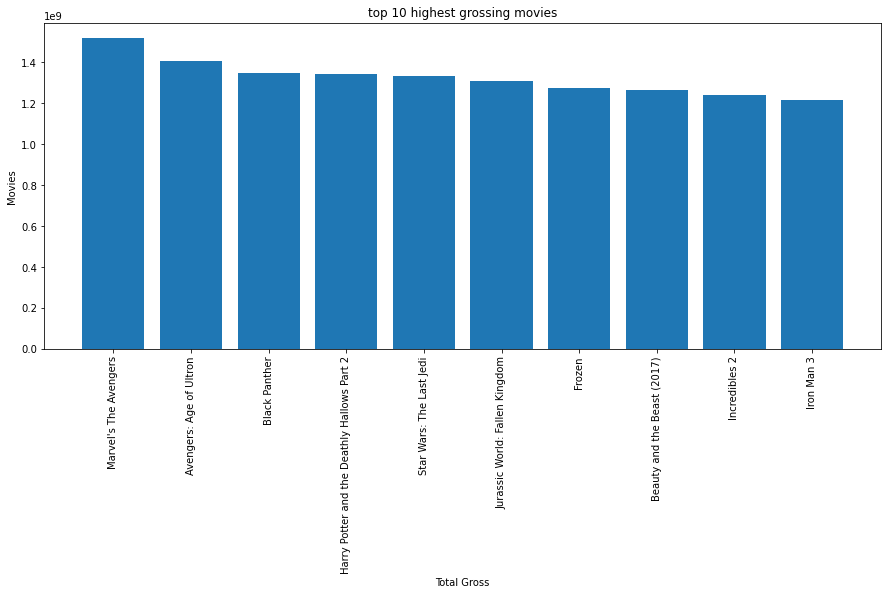

In [36]:
bar_chart_title = 'top 10 highest grossing movies'
bar_chart_count_label = 'Movies'
bar_chart_series_label = 'Total Gross'



top_10_highest_grossing_movies = df_bom.sort_values('total_gross', ascending=False)[0:10]

player_count_figure, ax = plt.subplots(figsize=(15, 6))


x = top_10_highest_grossing_movies['title']
y = top_10_highest_grossing_movies['total_gross']

ax.set_title(bar_chart_title)
ax.set_xlabel(bar_chart_series_label)
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel(bar_chart_count_label)
ax.bar(x, y)

In [46]:
df_bom['studio'].value_counts()[0:10]

Uni.     144
Fox      134
WB       130
Sony     105
BV       104
Par.      94
LGF       87
Wein.     69
IFC       68
SPC       59
Name: studio, dtype: int64

In [2]:
bar_chart_title = 'Studios With Highest Total Gross '
bar_chart_count_label = 'studio'
bar_chart_series_label = 'Number of movies'



top_10_studio = df_bom['studio'].value_counts()[0:10]

player_count_figure, ax = plt.subplots(figsize=(15, 6))


x = top_10_studio.index
y = top_10_studio.values

ax.set_title(bar_chart_title)
ax.set_xlabel(bar_chart_series_label)
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel(bar_chart_count_label)
ax.bar(x, y)

NameError: name 'df_bom' is not defined

In [53]:
df_bom['total_gross'] = df_bom['total_gross'].astype(int)

In [54]:
top_10_highest_gross_studio = df_bom.sort_values('total_gross', ascending=False)[0:10]
top_10_highest_gross_studio

,title,studio,domestic_gross,foreign_gross,year,total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1518900000
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1405400000
3080,Black Panther,BV,700100000.0,646900000.0,2018,1347000000
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1341500000
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1332600000
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018,1309500000
1127,Frozen,BV,400700000.0,875700000.0,2013,1276400000
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017,1263500000
3082,Incredibles 2,BV,608600000.0,634200000.0,2018,1242800000
1128,Iron Man 3,BV,409000000.0,805800000.0,2013,1214800000


In [63]:
studio_sums = df_bom.groupby(by = 'studio').sum()
studio_sums.head(10)

,domestic_gross,foreign_gross,year,total_gross
studio,,,,
3D,6100000.0,9900000.0,2010,16000000
A24,260456800.0,238462200.0,38294,498919000
AF,1155000.0,3500000.0,4024,4655000
AGF,15800.0,161000.0,2011,176800
AR,350000.0,57700000.0,2016,58050000
ATO,1013500.0,834700.0,4023,1848200
Abr.,3146000.0,10301000.0,4026,13447000
Affirm,23400000.0,5640000.0,4035,29040000
Amazon,16999999.0,34800000.0,10089,51799999


In [76]:
studio_total_gross = studio_sums['total_gross']
studio_total_gross_sum = studio_total_gross.sort_values(ascending=False)[0:10]
studio_total_gross_sum

studio
BV         44190383898
Fox        30980366596
WB         30791502998
Uni.       29746809191
Sony       22404715096
Par.       19444197697
WB (NL)    10314099999
LGF         8467470700
LG/S        5318923998
P/DW        5076500000
Name: total_gross, dtype: int64

In [70]:
type(studio_total_gross_sum)

pandas.core.series.Series

In [1]:
bar_chart_title = 'top 10 studios with the highest total gross'
bar_chart_count_label = 'Total Gross'
bar_chart_series_label = 'Studio'


player_count_figure, ax = plt.subplots(figsize=(15, 6))


x = studio_total_gross_sum.index
y = studio_total_gross_sum.values

ax.set_title(bar_chart_title)
ax.set_xlabel(bar_chart_series_label)
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel(bar_chart_count_label)
ax.bar(x, y)

NameError: name 'plt' is not defined